In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# импортируем функции библиотеки sklearn чтобы построить модели предсказаний
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#импортируем модуль и функцию для простого получения остатков при предсказании (величин ошибок)
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Задание 1.
## Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?
Построить точечный график

Рассчитать коэффициенты корреляции Пирсона и Спирмена

Построить модель линейной регрессии

Рассчитать коэффициент детерминации

Вывести график остатков

In [2]:
# прочитаем ДС из файла
df_water = pd.read_csv('water.csv')
df_water

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

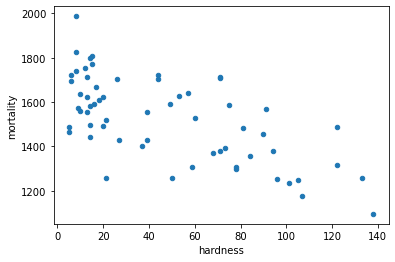

In [44]:
# построим точеную диаграмму. Визуально оценим наличие корреляции 
df_water.plot(kind='scatter', x='hardness', y='mortality')

Предополжительно, есть среднесильная обартная связь. 

**Проверим на коэффициентах корреляции Пирсона и Спирмана**

In [7]:
#  Рассчитаем коэф корреляции Пирсона
df_water[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


Как и предполагалось по точечной диаграмме, наблюдаем средне-сильную обратную связь

In [45]:
#  Рассчитаем коэф корреляции Спирмана для проверки 
# Как один из факторов доп расчета, жесткость воды - это дискретная величина 
df_water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Коэф корреляции Спирмана также подтверждает наличие средне-сильной обратной связи

**Предварительный вывод:**
Между показателем жесткости воды и кол-во смертей есть статистическая обратная связь

# Построим модель предсказаний на основании тех данных, что у нас есть

In [10]:
# Зададим переменные для модели
X = df_water[['hardness']]
y = df_water['mortality']

In [11]:
# разделим данные на тренировочные и тестовые. Размер тестовой базы - 30%
# укажем постоянный сценарий генератора псевдослучайных чисел через random_state (можеть быть любое значение)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=19)

In [12]:
# Посмотрим на размер тернировочной базы
X_train.shape

(42, 1)

In [14]:
# Зададим переменную модели
model = LinearRegression()
# проведем обучение модели на тренировочных данных
model.fit(X_train, y_train) #подбираем оптимальные коэффециенты для тех данных, что мы загрузили в тренировочную базу

LinearRegression()

In [15]:
model.coef_ # a в линейной формуле зависимости y = ax + b

array([-3.09854726])

In [16]:
model.intercept_ # b в линейной формуле зависимости y = ax + b

1662.6956898036124

In [17]:
# рассчитаем предсказания для тестового куска данных 
y_pred = model.predict(X_test)
# посмотрим на список полученных значений
y_pred

array([1284.67292443, 1644.10440626, 1442.69883454, 1365.23515311,
       1619.3160282 , 1380.7278894 , 1616.21748095, 1411.71336197,
       1622.41457546, 1647.20295352, 1476.78285437, 1579.03491386,
       1637.90731175, 1548.04944129, 1610.02038643, 1600.72474466,
       1421.00900374, 1597.6261974 , 1526.35961049])

In [18]:
#рассчитаем коэф детерминации для тестового куска
model.score(X_test, y_test) 

0.4269737182510156

Получили коэф детерминации = 0.43 

Относительно низкий показатель коэффициента детерминации говорит о том, что в прогнозируемых данных большие остатки (разница между предсказанными значениями и показателями тестовой части ДС)

Считаю, что в первую очередь такая точность модели обусловлена небольгшим кол-вом тренировочных данных 

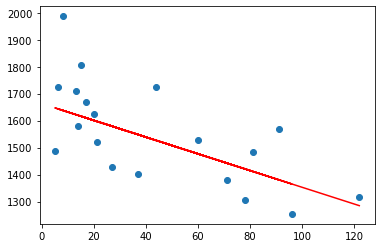

In [19]:
# Построим точечную диаграмму тестовых данных и сравним с линейной регрессией
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

На графике видим разброс от линии регрессии. Визуально только 1 значение можно посчитать выбросом (Смертность около 2000 при значении жесткости воды около 10). Из этого можно сделать вывод, что, **в целом, модель построена верно**

## Рассчитаем остатки и дополнитетльные статистические показатели модели с помощью библиотеки statsmodels

In [24]:
# Добавим константу из сформированной тренировочной базы
X_const = sm.add_constant(X_train) #техническая особенность библиотеки. Надо руками добавить константу

D:\python a\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
# Инициируем переменную модели и запустим обучение модели
model = sm.OLS(y_train, X_const)
result = model.fit()
# выведем статистические показатели модели
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     28.66
Date:                Sun, 15 May 2022   Prob (F-statistic):           3.81e-06
Time:                        12:24:02   Log-Likelihood:                -267.69
No. Observations:                  42   AIC:                             539.4
Df Residuals:                      40   BIC:                             542.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1662.6957     36.088     46.073      0.0

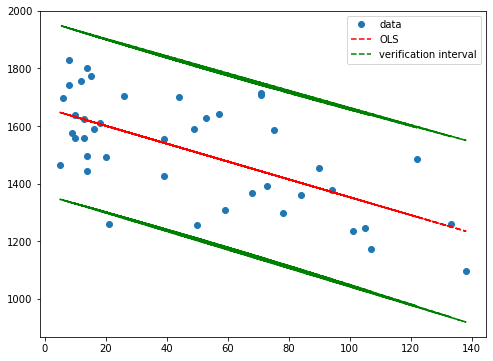

In [57]:
prstd, iv_l, iv_u = wls_prediction_std(result)
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличемнием кол-ва факторов этот интервал будет уменьшаться 
fig, ax = plt.subplots(figsize=(8,6))

# создадим сабплот точечную диаграмму результатов тренировочной базы
ax.plot(X_const.iloc[:, 1], y_train, 'o', label='data')
# сабплот линии регрессии тренировочного ДС
ax.plot(X_const.iloc[:, 1], result.fittedvalues, 'r--', label='OLS')
# верхний доверительный интервал
ax.plot(X_const.iloc[:, 1], iv_u, 'g--', label='verification interval')
# нижний доверительный интервал
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

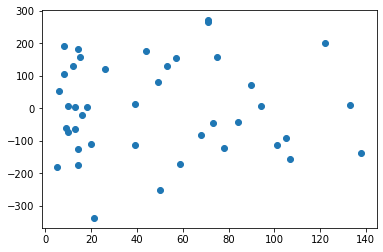

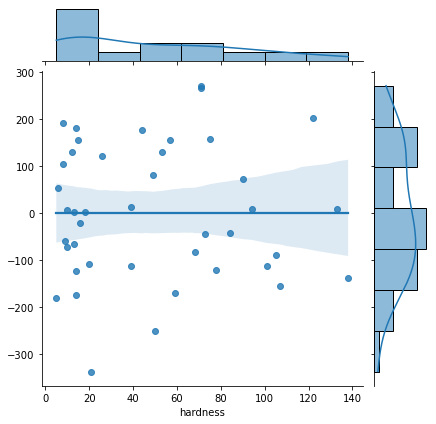

In [50]:
# через функцию resid в библиотеке statsmodels получим значения остатков и выведем их посмотрим их на точечной диаграмме
plt.scatter(X_const.iloc[:, 1], result.resid)
# дополнительно, с помощью seaborn.jointplot(kind='reg') посмотрим на линейную регрессию остатоков
sns.jointplot(x=X_const.iloc[:, 1], y=result.resid, kind='reg')
plt.show()

Остатки распределны с нулевым средним значением 
На точечной диаграмме наблюдаем рассеяние точек. Системы не просматривается.

Из этого можем сделать вывод, наклон линии регрессии для ДС выбран верно. 

(array([1., 1., 4., 6., 7., 7., 3., 4., 7., 2.]),
 array([-337.6261974 , -276.83346112, -216.04072483, -155.24798854,
         -94.45525226,  -33.66251597,   27.13022031,   87.9229566 ,
         148.71569288,  209.50842917,  270.30116546]),
 <BarContainer object of 10 artists>)

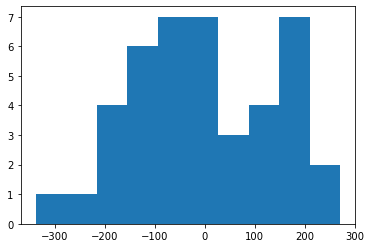

In [29]:
plt.hist(result.resid)

Гисторамма не выглядит, как нормальное распределние. Полагаю, что при большем кол-ве входных параметров - гистрогамма будет приближается к нормальному распределнию 

# Задание 2.
## Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы

Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [62]:
# разделим данные на 2 группы. 
df_water_south = df_water[df_water['location'] == 'South']
df_water_north = df_water[df_water['location'] == 'North']

<AxesSubplot:title={'center':'North'}, xlabel='hardness', ylabel='mortality'>

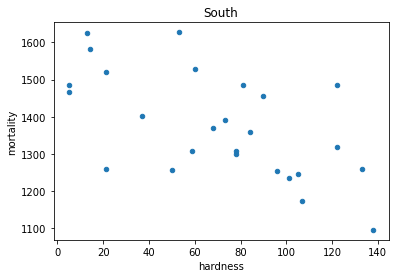

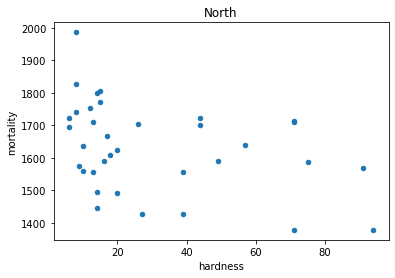

In [64]:
# Построим точечные диаграммы по локациям
df_water_south.plot(kind='scatter', x='hardness', y='mortality', title='South')
df_water_north.plot(kind='scatter', x='hardness', y='mortality', title='North')

**Из визуализации наблюдаем:**
1. На юге прослеживается слабая линейная зависимость
2. На севере показатели сконцентрированы в левой части диаграммы, что говорит о том, что в большей части городов севера вода мягкая. Это может значить, что никакой связи между значением жесткости воды и количеством смерте просто нет.

In [67]:
#  Рассчитаем коэффициенты корреляции Пирсона
print(f"""Коэффициент корреляции Пирсон: 
Для юга: {df_water_south[['hardness', 'mortality']].corr()}

Для севера: {df_water_north[['hardness', 'mortality']].corr()}

Коэффициент корреляции Спирмана: 
Для юга: {df_water_south[['hardness', 'mortality']].corr(method='spearman')}

Для севера: {df_water_north[['hardness', 'mortality']].corr(method='spearman')}""")


Коэффициент корреляции Пирсон: 
Для юга:            hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000

Для севера:            hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000

Коэффициент корреляции Спирмана: 
Для юга:            hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000

Для севера:            hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000


Коэф корреляции Спирмана говорит нам о том, что связи между показателями в разделенных по локациям ДС слабее, чем в едином. 
Благодаря визуализации и большой разницы между коэф корреляции Пирсона и Спирмана во внимание будем принимать коэф. Спирмана, так как он меньше подвержен выбросам. 

**В обоих ДС наблюдаем слабую отрицательную связь**

# Построим модель предсказаний для обоих ДС

In [80]:
X_s = df_water_south[['hardness']]
y_s = df_water_south['mortality']
X_n = df_water_north[['hardness']]
y_n = df_water_north['mortality']

# Учитывая, что данных стало еще меньше, отдадим на тренировку 90% ДС 
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.10, random_state=32)
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, y_n, test_size=0.10, random_state=32)

model_s = LinearRegression()
model_n = LinearRegression()
model_s.fit(X_s_train, y_s_train)
model_n.fit(X_n_train, y_n_train)

LinearRegression()

In [81]:
print(f"""Коэффициент линейной зависимости для юга: {model_s.coef_}
Постоянная для юга: {model_s.intercept_}
Коэффициент линейной зависимости для севера: {model_n.coef_}
Постоянная для севера:{model_n.intercept_}
""")

Коэффициент линейной зависимости для юга: [-2.11030562]
Постоянная для юга: 1526.96913602583
Коэффициент линейной зависимости для севера: [-2.43541169]
Постоянная для севера:1697.4147112475782



In [82]:
y_s_pred = model_s.predict(X_s_test)
y_n_pred = model_n.predict(X_n_test)

In [83]:
#рассчитаем коэф детерминации для тестового куска
print(f"""коэф детерминации для юга: {model_s.score(X_s_test, y_s_test)} 
коэф детерминации для севера: {model_n.score(X_n_test, y_n_test)} """)

# При показателях тренировочной базы в 20% получили: 
# коэф детерминации для юга: 0.176636001811051 
# коэф детерминации для севера: -0.4697769333996473 

коэф детерминации для юга: 0.8760334283395004 
коэф детерминации для севера: -1.8175928274497197 


При показателях тестовой базы в 30% получили: 
1. коэф детерминации для юга: -0.03499977700726786 
2. коэф детерминации для севера: -1.0240859859492204 

При показателях тестовой базы в 20% получили: 
1. коэф детерминации для юга: 0.176636001811051 
2. коэф детерминации для севера: -0.4697769333996473 

При показателях тестовой базы в 10% получили: 
1. коэф детерминации для юга: 0.8760334283395004 
2. коэф детерминации для севера: -1.8175928274497197 

Чем большую часть ДС мы отдаем на тренировку, тем больший коэффициент детерминации получаем по югу и тем меньший по северу, что косвенно подтверждает предыдущие выводы. 
Можно попробовать исключить выбросы из базы севера и попробовать обучить модель на новой базе, посмотреть результаты. 

<AxesSubplot:>

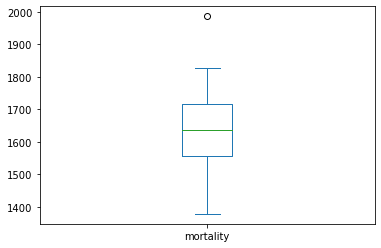

In [84]:
df_water_north['mortality'].plot(kind='box')
# видим один выброс около 2000 смертей. Исключим его из ДС 

In [89]:
df_water_north_clear = df_water_north[df_water_north['mortality'] < 1900]
X_n = df_water_north_clear[['hardness']]
y_n = df_water_north_clear['mortality']
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, y_n, test_size=0.10, random_state=32)
model_n = LinearRegression()
model_n.fit(X_n_train, y_n_train)
print(f"""
Коэффициент линейной зависимости для севера: {model_n.coef_}
Постоянная для севера:{model_n.intercept_}
""")
y_n_pred = model_n.predict(X_n_test)
print(f""" 
коэф детерминации для севера: {model_n.score(X_n_test, y_n_test)} """)


Коэффициент линейной зависимости для севера: [-2.06406736]
Постоянная для севера:1681.4729023462419

 
коэф детерминации для севера: -2.5083051232937725 


In [90]:
print(f"""Коэффициент корреляции Пирсон: 
Для севера: {df_water_north_clear[['hardness', 'mortality']].corr()}

Коэффициент корреляции Спирмана: 
Для севера: {df_water_north_clear[['hardness', 'mortality']].corr(method='spearman')}""")

Коэффициент корреляции Пирсон: 
Для севера:            hardness  mortality
hardness   1.000000  -0.341395
mortality -0.341395   1.000000

Коэффициент корреляции Спирмана: 
Для севера:            hardness  mortality
hardness   1.000000  -0.357378
mortality -0.357378   1.000000


Несмотря на то, что коэффициенты Спирмана и Пирсона выровнялись между собой (значит выброс влиял на коэф корреляции Пирсона и мы ранее сделали верный вывод), коэф детерминации в любом случае имеет отрицательное значение. Отсюда следует, что вычисление среднего работает точнее, чем созданная нами модель 

# Построим графики для моделей юга и севера без выбросов

Text(0.5, 1.0, 'South')

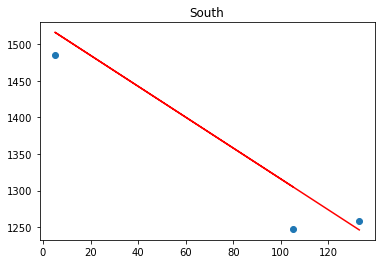

In [94]:
plt.scatter(X_s_test, y_s_test)
plt.plot(X_s_test, y_s_pred, c='r')
plt.title('South')

Text(0.5, 1.0, 'South')

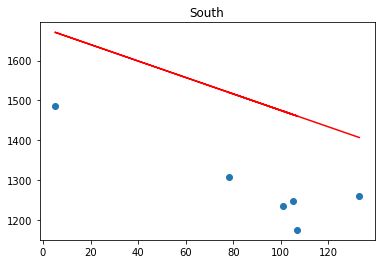

In [104]:
# Изменим модель тестовый размер на 20% и перезапустим график 
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.20, random_state=32)
model_s = LinearRegression()
model_s.fit(X_n_train, y_n_train)
y_s_pred = model_s.predict(X_s_test)
plt.scatter(X_s_test, y_s_test)
plt.plot(X_s_test, y_s_pred, c='r')
plt.title('South')

Text(0.5, 1.0, 'South')

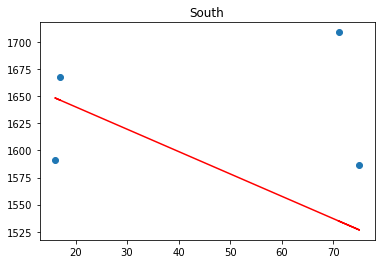

In [105]:
plt.scatter(X_n_test, y_n_test)
plt.plot(X_n_test, y_n_pred, c='r')
plt.title('South')

В обоих выборках, визуально, модель показывает очень плохие результаты. 

## Проверим коэф детерминации 

In [108]:
X_s_const = sm.add_constant(X_s_train)
model_s = sm.OLS(y_s_train, X_s_const)
result_s = model_s.fit()
# выведем статистические показатели модели
print('Статистические показатели для юга:')
print(result_s.summary())
print("""===================================================================

===================================================================""")

X_n_const = sm.add_constant(X_n_train)
model_n = sm.OLS(y_n_train, X_n_const)
result_n = model_n.fit()
# выведем статистические показатели модели
print('Статистические показатели для севера:')
print(result_n.summary())

Статистические показатели для юга:
                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     5.869
Date:                Mon, 16 May 2022   Prob (F-statistic):             0.0262
Time:                        10:50:26   Log-Likelihood:                -123.77
No. Observations:                  20   AIC:                             251.5
Df Residuals:                      18   BIC:                             253.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1519.

D:\python a\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
D:\python a\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


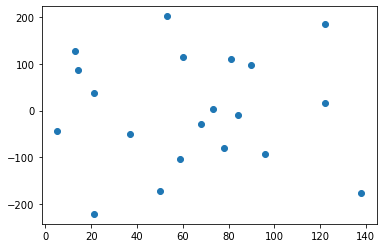

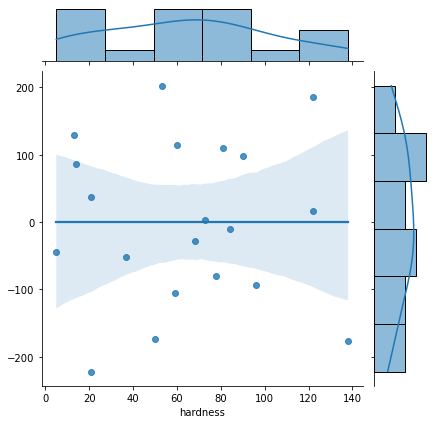

In [109]:
# через функцию resid в библиотеке statsmodels получим значения остатков и выведем их посмотрим их на точечной диаграмме
plt.scatter(X_s_const.iloc[:, 1], result_s.resid)
# дополнительно, с помощью seaborn.jointplot(kind='reg') посмотрим на линейную регрессию остатоков
sns.jointplot(x=X_s_const.iloc[:, 1], y=result_s.resid, kind='reg')
plt.show()

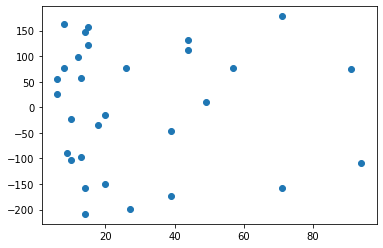

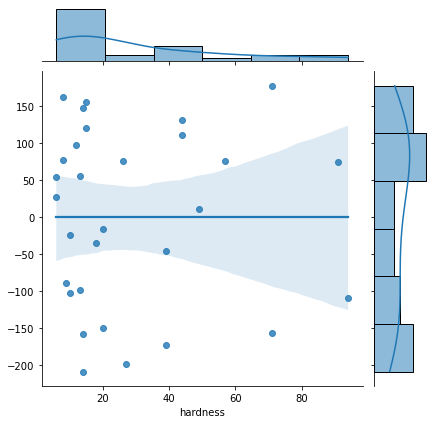

In [110]:
# через функцию resid в библиотеке statsmodels получим значения остатков и выведем их посмотрим их на точечной диаграмме
plt.scatter(X_n_const.iloc[:, 1], result_n.resid)
# дополнительно, с помощью seaborn.jointplot(kind='reg') посмотрим на линейную регрессию остатоков
sns.jointplot(x=X_n_const.iloc[:, 1], y=result_n.resid, kind='reg')
plt.show()

(array([1., 2., 1., 2., 4., 2., 1., 4., 1., 2.]),
 array([-221.81972975, -179.38786535, -136.95600096,  -94.52413656,
         -52.09227216,   -9.66040776,   32.77145664,   75.20332103,
         117.63518543,  160.06704983,  202.49891423]),
 <BarContainer object of 10 artists>)

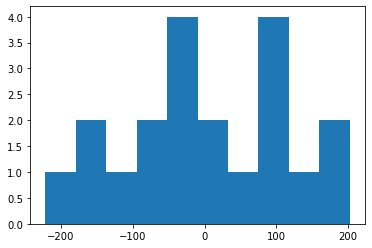

In [111]:
plt.hist(result_s.resid)

(array([3., 3., 3., 1., 3., 2., 3., 5., 3., 4.]),
 array([-208.57595938, -169.91077545, -131.24559153,  -92.5804076 ,
         -53.91522368,  -15.25003976,   23.41514417,   62.08032809,
         100.74551202,  139.41069594,  178.07587986]),
 <BarContainer object of 10 artists>)

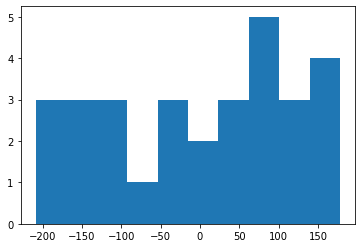

In [112]:
plt.hist(result_n.resid)

Остатки распределны с нулевым средним значением 
На точечной диаграмме наблюдаем рассеяние точек. Системы не просматривается.
Из этого можем сделать вывод, наклон линии регрессии для ДС выбран верно (для тех данных, что у нас имеются)

Вместе с тем, распределние остатков не выглядит нормальным ни для одного ДС. 

Предполагаемая причина - маленькое кол-во данных для обоих моделей. 

## Общий вывод: 
При разделении ДС по локациям, учитывая распределение показателей и различные коэф, ставим под сомнение зависимость показателя смертности от жесткости воды в городе

Важно отметить: 
1. Помимо жесткости воды необхоидмо учитывать наличие производства продуктов питания в каждом городе, что может влиять на соседние города, потребляющие данные продукты. 
2. Важно принимать во внимание развитость медицинского обслуживания, что напрямую будет влиять на показатели смертности 
3. К дополнительным факторам также следует отнести уровени дохода, преступности, состояния воздуха и т.д. 